# How to classify MNIST digits with different neural network architectures
### Getting started with neural networks and Keras
(https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3)

Terms:
- The name x refers to input data, while the name y refers to the labels. ŷ (pronounced y-hat) refers to the predictions made by a model.
- Training data is the data our model learns from.
- Test data is kept secret from the model until after it has been trained. Test data is used to evaluate our model.
- A loss function is a function to quantify how accurate a model’s predictions were.
- An optimization algorithm controls exactly how the weights of the computational graph are adjusted during training

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnistnpz/mnist.npz


In [81]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('../input/mnistnpz/mnist.npz')


In [82]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


- Create a vector as long as the number of categories we have, and force the model to set exactly one of the positions in the vector to 1 and the rest to 0 (the single 1 is the “hot” value within the vector).

In [83]:
import keras
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])


First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Neural network architectures
1. How many layers are there?
2. How many nodes are there in each of those layers?
3. What transfer/activation function is used at each of those layers?

- Use the sigmoid transfer function for all of the hidden layers
- Common loss function called categorical cross entropy.
- Simplest optimization algorithms: Stochastic Gradient Descent (SGD).

In [84]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


### Building the network
- All the networks in this article will have the same input layer and output layer. We defined the input layer earlier as a vector with 784 entries — this is the data from the flattened 28x28 image. The output layer was also implicitly defined earlier when we created a one-hot encoded vector from the labels — the ten labels correspond to the ten nodes in this layer.
- Our output layer also uses a special activation function called softmax. This normalizes the values from the ten output nodes such that:
    - all the values are between 0 and 1, and
    - the sum of all ten values is 1.
    
- Finally, this model has a single hidden layer with 32 nodes using the sigmoid activation function. The resulting architecture has 25,450 tunable parameters. From the input layer to the hidden layer there are 784*32 = 25,088 weights. The hidden layer has 32 nodes so there are 32 biases. This brings us to 25,088 + 32 = 25,120 parameters.
    - From the hidden layer to the output layer there are 32*10 = 320 weights.
    - Each of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.

#### Train and evaluate model

Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 1.5669 - accuracy: 0.5528 - val_loss: 0.5476 - val_accuracy: 0.8802
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5641 - accuracy: 0.8581 - val_loss: 0.3947 - val_accuracy: 0.8983
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8801 - val_loss: 0.3302 - val_accuracy: 0.9115
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8861 - val_loss: 0.3190 - val_accuracy: 0.9100
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8952 - val_loss: 0.2994 - val_accuracy: 0.9135
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8996 - val_loss: 0.2636 - val_accuracy: 0.9213
Epoch 7/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3225 - accuracy: 0.9061 - val_loss: 0.2767 - val_accuracy: 0.9205
Epoch 

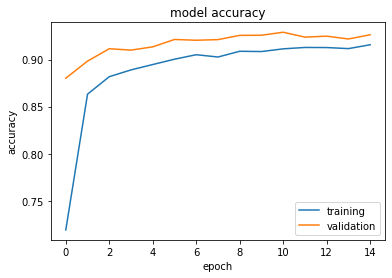

In [85]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


#print('Test loss:', score[0]) 
#print('Test accuracy:', score[1])

In [86]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    batch_size = 128
    epochs = 15
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
   # print(f'Test loss: {loss:.3}')
   # print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_61 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 1.4549 - accuracy: 0.5855 - val_loss: 0.5142 - val_accuracy: 0.8882
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.8639 - val_loss: 0.3695 - val_accuracy: 0.9040
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.8843 - val_loss: 0.3442 - val_accuracy: 0.9092
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3877 - ac

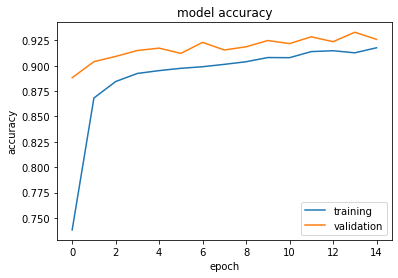


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_63 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.9287 - accuracy: 0.4551 - val_loss: 0.7943 - val_accuracy: 0.8708
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.7063 - accuracy: 0.8503 - val_loss: 0.4362 - val_accuracy: 0.8932
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0

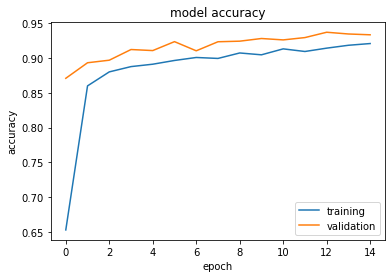


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.0474 - accuracy: 0.3256 - val_loss: 1.0866 - val_accuracy: 0.7342
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.9622 - accuracy: 0.7706 - va

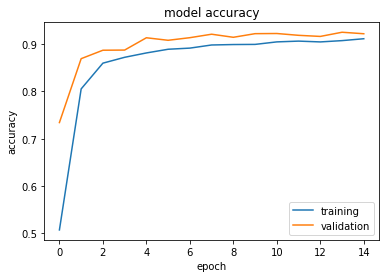


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.1564 - accuracy: 0.2625 - val_loss: 1.

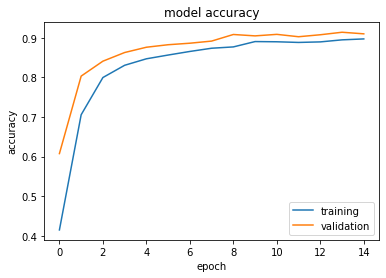

In [87]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_75 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 1s 3ms/step - loss: 1.3531 - accuracy: 0.6190 - val_loss: 0.5359 - val_accuracy: 0.8778
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.8634 - val_loss: 0.3782 - val_accuracy: 0.9038
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8872 - val_loss: 0.3284 - val_accuracy: 0.9158
Epoch 4/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3822 - ac

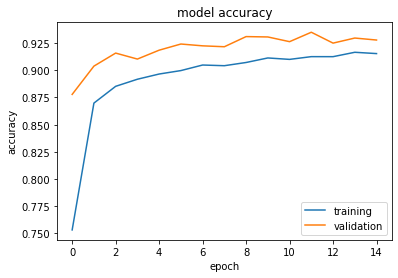


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 1.2004 - accuracy: 0.6670 - val_loss: 0.3901 - val_accuracy: 0.9067
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8903 - val_loss: 0.3163 - val_accuracy: 0.9168
Epoch 3/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.9007 - val_loss: 0.2768 - val_accuracy: 0.9257
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3290 - a

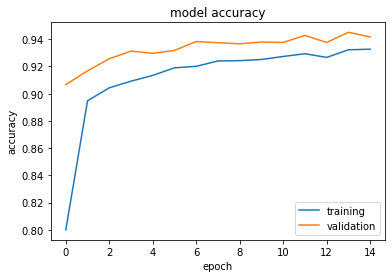


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.9479 - accuracy: 0.7356 - val_loss: 0.3062 - val_accuracy: 0.9205
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.9021 - val_loss: 0.2546 - val_accuracy: 0.9282
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.9125 - val_loss: 0.2340 - val_accuracy: 0.9345
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2848 -

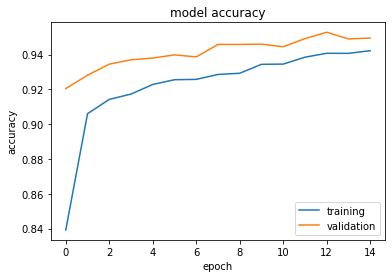


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.8293 - accuracy: 0.7676 - val_loss: 0.2670 - val_accuracy: 0.9308
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.9139 - val_loss: 0.2222 - val_accuracy: 0.9425
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2670 - accuracy: 0.9241 - val_loss: 0.2077 - val_accuracy: 0.9417
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2425 -

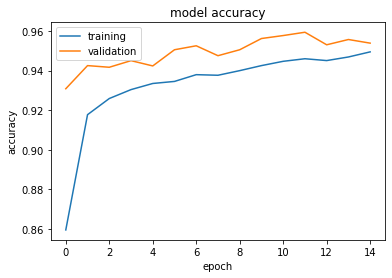


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_83 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 3s 6ms/step - loss: 0.6564 - accuracy: 0.8152 - val_loss: 0.2364 - val_accuracy: 0.9417
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2741 - accuracy: 0.9245 - val_loss: 0.2077 - val_accuracy: 0.9432
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2371 - accuracy: 0.9316 - val_loss: 0.1965 - val_accuracy: 0.9473
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.2252 -

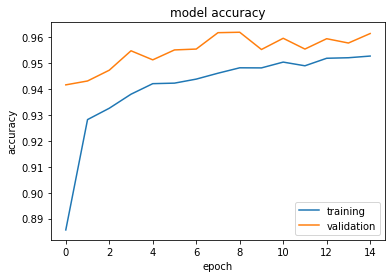


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_85 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 4s 9ms/step - loss: 0.5404 - accuracy: 0.8433 - val_loss: 0.2117 - val_accuracy: 0.9448
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2450 - accuracy: 0.9320 - val_loss: 0.1774 - val_accuracy: 0.9520
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2136 - accuracy: 0.9391 - val_loss: 0.1696 - val_accuracy: 0.9535
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.2005 -

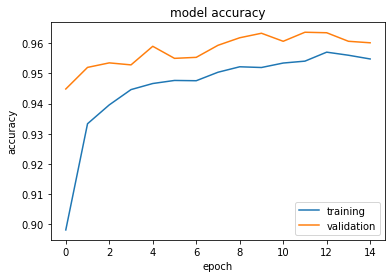


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_87 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 7s 17ms/step - loss: 0.4385 - accuracy: 0.8688 - val_loss: 0.1998 - val_accuracy: 0.9488
Epoch 2/15
422/422 [==============================] - 6s 15ms/step - loss: 0.2312 - accuracy: 0.9342 - val_loss: 0.1767 - val_accuracy: 0.9528
Epoch 3/15
422/422 [==============================] - 6s 15ms/step - loss: 0.2129 - accuracy: 0.9383 - val_loss: 0.1696 - val_accuracy: 0.9533
Epoch 4/15
422/422 [==============================] - 6s 15ms/step - loss: 

KeyboardInterrupt: 

In [ ]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

In [59]:
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 2.0249 - accuracy: 0.3882 - val_loss: 0.9659 - val_accuracy: 0.7800
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.8723 - accuracy: 0.7760 - val

KeyError: 'acc'